In [47]:
%matplotlib inline

import pandas as pd
import seaborn as sns

In [2]:
s2 = pd.read_csv("srep00196-s2.csv")

In [3]:
s2.head()

,black_sesame_seed,rose_wine,3
0,fennel,wild_berry,5
1,comte_cheese,grape,57
2,nira,raw_beef,1
3,corn_mint_oil,parsnip_fruit,2
4,soybean,vegetable_oil,1


In [36]:
data = {}

with open("srep00196-s3.csv") as f:
    
    #head = [next(f) for x in range(100)]
    for line in f:
        ll = line.split(",")
        
        #print(line)
        if len(ll) > 0:
            area = ll[0]
            ingredients = ll[1:]
            #print(area)
            
            #break
            if area in data.keys():
                #print(area)
                
                for ingredient in ingredients:
                    ingredient = ingredient.strip()
                    if ingredient in data[area].keys():
                        data[area][ingredient] += 1
                    else:
                        data[area][ingredient] = 1
            else:
                data[area] = {}

import pprint
pprint.pprint(data)

{'African': {'almond': 44,
             'anise': 2,
             'anise_seed': 1,
             'apple': 6,
             'apricot': 23,
             'artichoke': 1,
             'avocado': 1,
             'bacon': 1,
             'banana': 4,
             'barley': 4,
             'basil': 8,
             'bay': 15,
             'bean': 10,
             'beef': 31,
             'beef_broth': 7,
             'beet': 3,
             'bell_pepper': 103,
             'black_bean': 1,
             'black_pepper': 98,
             'bone_oil': 2,
             'brandy': 3,
             'brassica': 3,
             'bread': 22,
             'broccoli': 3,
             'brown_rice': 1,
             'butter': 68,
             'cabbage': 4,
             'cane_molasses': 11,
             'caraway': 26,
             'cardamom': 19,
             'carrot': 49,
             'cassava': 3,
             'cauliflower': 4,
             'cayenne': 116,
             'celery': 13,
             'cheese': 3,
     

                   'gelatin': 1274,
                   'geranium': 1,
                   'gin': 62,
                   'ginger': 2254,
                   'goat_cheese': 163,
                   'grape': 283,
                   'grape_juice': 572,
                   'grapefruit': 91,
                   'green_bell_pepper': 1980,
                   'green_tea': 12,
                   'gruyere_cheese': 19,
                   'guava': 8,
                   'haddock': 18,
                   'ham': 943,
                   'hazelnut': 161,
                   'herring': 3,
                   'honey': 1955,
                   'hop': 2,
                   'horseradish': 339,
                   'huckleberry': 9,
                   'jasmine': 4,
                   'jasmine_tea': 1,
                   'juniper_berry': 9,
                   'kale': 59,
                   'katsuobushi': 1,
                   'kidney_bean': 288,
                   'kiwi': 74,
                   'kohlrabi': 3,
         

In [39]:
df = pd.DataFrame.from_dict(data).transpose().fillna(value=0)

df[df.columns] = df[df.columns].astype(int)

df.index.name = "area"

df

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
area,,,,,,,,,,,,,,,,,,,,,
African,44,0,2,1,6,0,23,0,0,1,...,0,2,12,4,4,0,2,9,7,25
EastAsian,25,0,0,4,19,0,4,0,12,0,...,0,1,30,1,150,0,0,41,3,4
EasternEuropean,15,0,2,0,18,0,18,0,0,0,...,4,5,16,1,1,0,0,48,6,1
LatinAmerican,57,0,9,17,26,0,10,0,0,1,...,1,12,58,16,15,0,2,63,21,56
MiddleEastern,52,0,0,1,31,0,30,0,0,6,...,1,1,20,8,8,0,7,21,56,30
NorthAmerican,1658,1,124,23,2129,25,458,4,0,256,...,122,284,1291,614,486,30,64,2811,700,759
NorthernEuropean,46,0,0,4,14,0,1,0,0,0,...,1,1,13,3,3,0,0,23,2,0
SouthAsian,26,0,0,3,20,0,8,0,0,0,...,0,1,11,9,4,0,3,10,148,13
SoutheastAsian,3,0,1,0,4,0,1,0,0,0,...,0,0,18,1,20,0,2,8,2,7


In [40]:
df.to_csv("clean_ingredientsByArea.csv")

In [43]:
df[df > 20]

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
area,,,,,,,,,,,,,,,,,,,,,
African,44.0,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0
EastAsian,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,NaN,150.0,NaN,NaN,41.0,NaN,NaN
EasternEuropean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN
LatinAmerican,57.0,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,58.0,NaN,NaN,NaN,NaN,63.0,21.0,56.0
MiddleEastern,52.0,NaN,NaN,NaN,31.0,NaN,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,56.0,30.0
NorthAmerican,1658.0,NaN,124.0,23.0,2129.0,25.0,458.0,NaN,NaN,256.0,...,122.0,284.0,1291.0,614.0,486.0,30.0,64.0,2811.0,700.0,759.0
NorthernEuropean,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN
SouthAsian,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.0,NaN
SoutheastAsian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


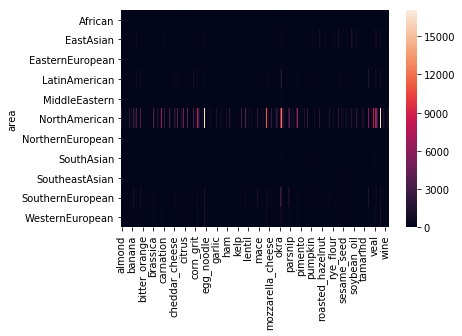

In [48]:
sns.heatmap(df);